In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/sheth/Desktop/fake_transactional_data_24.csv')
df

#First few rows of the dataframe
print(df.head())

#Summary of the data
print(df.describe())

#Checking for missing values
print(df.isnull().sum())


   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  
       from_totally_fake_account  monopoly_money_amount
count               1.014828e+07           1.014828e+07
mean                5.080502e+04           1.839348e+01
std                 2.893710e+04           8.612323e+01
min                 1.000000e+03           1.450000e+00
25%                 2.530400e+04           2.650000e+

Checking for Outliers with different approaches

In [28]:
#Approach1
from scipy import stats
# z-score for 'monopoly_money_amount'
z_scores = stats.zscore(df['monopoly_money_amount'])
# Threshold for outlier detection (e.g., 3 or -3)
threshold = 3

#Data points with z-score greater than the threshold
outliers = df['monopoly_money_amount'][abs(z_scores) > threshold]
print(outliers)


11405        290.0
15281       1970.0
15282        440.0
15545        302.0
15546        302.0
             ...  
10077650     282.0
10089362     296.0
10104950     277.0
10105128     298.0
10139485     298.0
Name: monopoly_money_amount, Length: 75524, dtype: float64


In [29]:
#Approach2
#Calculating first quartile (Q1) and third quartile (Q3)
Q1 = df['monopoly_money_amount'].quantile(0.25)
Q3 = df['monopoly_money_amount'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1

#Data points that are potential outliers
outliers = df[(df['monopoly_money_amount'] < (Q1 - 1.5 * IQR)) | (df['monopoly_money_amount'] > (Q3 + 1.5 * IQR))]['monopoly_money_amount']
print(outliers)
len(outliers)  #75524 Outliers

25           84.00
61          180.00
126         163.00
130         130.00
146          37.55
             ...  
10148190     42.00
10148211    193.00
10148215     33.47
10148238    106.00
10148265     65.00
Name: monopoly_money_amount, Length: 1008638, dtype: float64


1008638

In [30]:
#Feature Scaling
#Calculate percentiles
percentiles = df['monopoly_money_amount'].quantile([0.2, 0.4, 0.6, 0.8, 0.95])

#Defining the boundaries for the categories
P1 = percentiles.iloc[0]  # 20th percentile
P2 = percentiles.iloc[1]  # 40th percentile
P3= percentiles.iloc[2]  # 60th percentile
P4 = percentiles.iloc[3]  # 80th percentile
P5 = percentiles.iloc[4]  # 95th percentile

#Categorizing transactions based on the amount
def categorize_amount(amount):
    if amount <= P1:
        return "Very Small Transactions"
    elif amount <= P2:
        return "Small Transactions"
    elif amount <= P3:
        return "Moderate Transactions"
    elif amount <= P4:
        return "Large Transactions"
    elif amount <= P5:
        return "Very Large Transactions"
    else:
        return "Extreme Transactions"

#Creating a new column for the transaction category
df['transaction_category'] = df['monopoly_money_amount'].apply(categorize_amount)

#Updated DataFrame 
print(df)


          from_totally_fake_account  monopoly_money_amount  \
0                           10371.0                   4.00   
1                           88339.0                   2.40   
2                           18555.0                   2.40   
3                           18555.0                   4.10   
4                           80792.0                   1.95   
...                             ...                    ...   
10148275                    32185.0                   2.65   
10148276                    32185.0                   2.45   
10148277                    57569.0                  14.00   
10148278                     1490.0                   9.00   
10148279                    53444.0                   2.65   

         to_randomly_generated_account not_happened_yet_date  \
0                               CINEMA            01/01/2025   
1                                40544            01/01/2025   
2                                85149            01/01/2025   

In [31]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category
0,10371.0,4.00,CINEMA,01/01/2025,Small Transactions
1,88339.0,2.40,40544,01/01/2025,Very Small Transactions
2,18555.0,2.40,85149,01/01/2025,Very Small Transactions
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions
4,80792.0,1.95,18555,01/01/2025,Very Small Transactions
...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Small Transactions
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Very Small Transactions
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Very Large Transactions
10148278,1490.0,9.00,57569,31/12/2025,Moderate Transactions


In [32]:
#Count of number of categorized transactions 
very_small_count = df[df['transaction_category'] == 'Very Small Transactions'].shape[0]
small_count = df[df['transaction_category'] == 'Small Transactions'].shape[0]
moderate_count = df[df['transaction_category'] == 'Moderate Transactions'].shape[0]
large_count = df[df['transaction_category'] == 'Large Transactions'].shape[0]
very_large_count = df[df['transaction_category'] == 'Very Large Transactions'].shape[0]
extreme_count = df[df['transaction_category'] == 'Extreme Transactions'].shape[0]

print("Number of transactions categorized as 'Very Small':", very_small_count)
print("Number of transactions categorized as 'Small':", small_count)
print("Number of transactions categorized as 'Moderate':", moderate_count)
print("Number of transactions categorized as 'Large':", large_count)
print("Number of transactions categorized as 'Very Large':", very_large_count)
print("Number of transactions categorized as 'Extreme':", extreme_count)


Number of transactions categorized as 'Very Small': 2033108
Number of transactions categorized as 'Small': 2250281
Number of transactions categorized as 'Moderate': 2070823
Number of transactions categorized as 'Large': 1823385
Number of transactions categorized as 'Very Large': 1471100
Number of transactions categorized as 'Extreme': 499583


Filtering Transactions based on their narrations and making a new feature that diffentiates transactions among each category

In [33]:
#Defining keywords related to cafes or coffee
cafe_keywords = ['coffee', 'cafe']  

#Filtering transactions containing keywords related to cafes or coffee
cafe_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(cafe_keywords), case=False, na=False)]

#Counting the number of cafe transactions
cafe_transactions_count = len(cafe_transactions)

#Filtering out transactions from the original dataframe based on cafe_transactions
non_cafe_transactions = df[~df.index.isin(cafe_transactions.index)]

#Non-cafe transactions
print("Non-Cafe Transactions:")
print(non_cafe_transactions)

#Extracting unique accounts associated with non-cafe transactions
accounts_non_cafe = non_cafe_transactions['to_randomly_generated_account'].unique()

#Count of non-cafe transactions
print("\nNumber of transactions not related to cafes or coffee:", len(non_cafe_transactions))

#Accounts with transactions not related to cafes or coffee
print("\nAccounts with transactions not related to cafes or coffee:")
print(accounts_non_cafe)

#Cafe transactions
print("Cafe Transactions:")
print(cafe_transactions) #Insight1: There are 2710537 transactions related to coffee spends

#Grouping transactions by the name of the coffee shop and count the occurrences
coffee_shop_frequency = cafe_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions in each coffee shop
print("Frequency of Transactions in Each Coffee Shop:")
print(coffee_shop_frequency)


Non-Cafe Transactions:
          from_totally_fake_account  monopoly_money_amount  \
0                           10371.0                   4.00   
1                           88339.0                   2.40   
2                           18555.0                   2.40   
4                           80792.0                   1.95   
12                          77222.0                   4.50   
...                             ...                    ...   
10148262                    24676.0                   2.20   
10148265                    68829.0                  65.00   
10148269                    66350.0                   5.00   
10148277                    57569.0                  14.00   
10148278                     1490.0                   9.00   

         to_randomly_generated_account not_happened_yet_date  \
0                               CINEMA            01/01/2025   
1                                40544            01/01/2025   
2                                85149  

In [34]:
#Defining keywords related to bars, pubs, or drinks
bar_pub_keywords = ['bar', 'pub', 'drinks', 'liquor'] 

#Filtering transactions containing keywords related to bars, pubs, or drinks
bar_pub_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(bar_pub_keywords), case=False, na=False)]

#bar/pub transactions
print("Bar/Pub Transactions:")
print(bar_pub_transactions) #Insight2: There are 2165313 transactions corresponding to Pub spends


#Grouping transactions by the name of the bar or pub and count the occurrences
bar_pub_frequency = bar_pub_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions in each bar or pub
print("Frequency of Transactions in Each Bar/Pub:")
print(bar_pub_frequency)


Bar/Pub Transactions:
          from_totally_fake_account  monopoly_money_amount  \
34                          82454.0                   12.0   
49                          60261.0                   13.0   
68                          77763.0                   10.5   
90                          71642.0                   10.0   
105                         92552.0                    5.0   
...                             ...                    ...   
10148212                    14036.0                    9.0   
10148220                    14214.0                   11.0   
10148240                    14277.0                   11.0   
10148255                     1490.0                   14.0   
10148277                    57569.0                   14.0   

         to_randomly_generated_account not_happened_yet_date  \
34                                 BAR            01/01/2025   
49                                 PUB            01/01/2025   
68                                 PUB   

In [35]:
#Defining keywords related to toys or video games
toy_video_game_keywords = ['toy', 'videogame']  

#Filtering transactions containing keywords related to toys or video games
toy_video_game_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(toy_video_game_keywords), case=False, na=False)]

#toy/video game transactions
print("Toy/Video Game Transactions:")
print(toy_video_game_transactions) #Insight3: There are 25607 transactions corresponding to Toy spends

#Grouping transactions by the account details and count the occurrences
toy_video_game_frequency = toy_video_game_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to toys or video games
print("Frequency of Transactions Related to Toys or Video Games:")
print(toy_video_game_frequency)


Toy/Video Game Transactions:
          from_totally_fake_account  monopoly_money_amount  \
25                          23972.0                   84.0   
360                         44472.0                   22.0   
450                         63615.0                   56.0   
1130                        89603.0                   20.0   
1199                        27700.0                   10.0   
...                             ...                    ...   
10147252                    59803.0                   48.0   
10147653                    80956.0                   98.0   
10147782                    58977.0                   49.0   
10147904                     4309.0                   86.0   
10148160                    18602.0                   74.0   

         to_randomly_generated_account not_happened_yet_date  \
25                            TOY_SHOP            01/01/2025   
360                       PET_TOY_SHOP            01/01/2025   
450                           TOY_

In [36]:
#Defining keywords related to toys or video games
Shopping_keywords = ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 
                            'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery',
                            'accessory', 'clothing', 'sport', 'running', 'kids']


#Filtering transactions containing keywords related to toys or video games
Shopping_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(Shopping_keywords), case=False, na=False)]

#Shopping transactions
print("Shopping Transactions:")
print(Shopping_transactions) #Insight3: There are 25607 transactions corresponding to Toy spends

#Grouping transactions by the account details and count the occurrences
Shopping_frequency = Shopping_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to toys or video games
print("Frequency of Transactions Related to Shopping:")
print(Shopping_frequency)


Shopping Transactions:
          from_totally_fake_account  monopoly_money_amount  \
25                          23972.0                   84.0   
61                          34142.0                  180.0   
126                          9323.0                  163.0   
130                          5347.0                  130.0   
180                         82519.0                  199.0   
...                             ...                    ...   
10148190                     1675.0                   42.0   
10148211                    14036.0                  193.0   
10148217                    70993.0                    7.0   
10148238                    14277.0                  106.0   
10148265                    68829.0                   65.0   

         to_randomly_generated_account not_happened_yet_date  \
25                            TOY_SHOP            01/01/2025   
61                    DEPARTMENT_STORE            01/01/2025   
126                   DEPARTMENT_STORE  

In [37]:
#Defining keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_keywords = ['restaurant', 'take away', 'chinese', 'steak', 'sandwich', 'hotel','kebab','lunch','curry']  

#Filtering transactions containing keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(restaurant_keywords), case=False, na=False)]

#restaurant transactions
print("Restaurant Transactions:")
#Insight4: There are 449032 transactions corresponding to Restaurant spends

#Grouping transactions by the account details and count the occurrences
restaurant_frequency = restaurant_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to restaurants
print("Frequency of Transactions Related to Restaurants:")
print(restaurant_frequency)


Restaurant Transactions:
Frequency of Transactions Related to Restaurants:
to_randomly_generated_account
LOCAL_RESTAURANT      172030
KEBAB_SHOP            111339
LUNCH_PLACE           111305
SANDWICH_SHOP         111143
LUNCH_VAN             110946
RESTAURANT             68053
TAKEAWAY_CURRY         61485
CHINESE_TAKEAWAY       60929
RESTAURANT_VOUCHER     14627
CHINESE_RESTAURANT      7468
INDIAN_RESTAURANT       7429
STEAK_HOUSE             7353
Name: count, dtype: int64


In [38]:
#Defining the keywords related to supermarkets
supermarket_keyword = ['supermarket','butchers', 'greengrocer']

#Filtering transactions containing the keywords
supermarket_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(supermarket_keyword), case=False, na=False)]

#Supermarket transactions
print("Supermarket Transactions:")
print(supermarket_transactions) #Insight6: There are 326917 transactions corresponding to Supermarket spends

#Grouping transactions by the account details and count the occurrences
supermarket_frequency = supermarket_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to supermarkets
print("Frequency of Transactions Related to Supermarkets:")
print(supermarket_frequency)

Supermarket Transactions:
          from_totally_fake_account  monopoly_money_amount  \
780                         46161.0                    7.0   
829                          6782.0                   28.0   
976                         41707.0                   11.0   
1291                        53618.0                   27.0   
1545                        88598.0                   26.0   
...                             ...                    ...   
10146756                    20965.0                   24.0   
10146895                     2076.0                   27.0   
10146948                    98305.0                   11.0   
10147889                     2795.0                   20.0   
10148091                    24230.0                   22.0   

         to_randomly_generated_account not_happened_yet_date  \
780                           BUTCHERS            01/01/2025   
829                        GREENGROCER            01/01/2025   
976                        GREENGROCE

In [39]:
#Defining categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Initializing dictionaries to store most and least expensive transactions for each category
most_expensive_transactions = {}
least_expensive_transactions = {}

#Iterating through each category and find the most and least expensive transactions
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    most_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmax()]
    least_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmin()]

#Most expensive and least expensive transactions for each category
for category in categories.keys():
    print(f"\nMost Expensive Transaction in {category} Transactions:")
    print(most_expensive_transactions[category])
    print(f"\nLeast Expensive Transaction in {category} Transactions:")
    print(least_expensive_transactions[category])


Most Expensive Transaction in Cafe Transactions:
from_totally_fake_account                      35034.0
monopoly_money_amount                              6.0
to_randomly_generated_account                     CAFE
not_happened_yet_date                       01/01/2025
transaction_category             Moderate Transactions
Name: 284, dtype: object

Least Expensive Transaction in Cafe Transactions:
from_totally_fake_account                        18555.0
monopoly_money_amount                               1.45
to_randomly_generated_account                COFFEE_SHOP
not_happened_yet_date                         01/01/2025
transaction_category             Very Small Transactions
Name: 6, dtype: object

Most Expensive Transaction in Pub Transactions:
from_totally_fake_account                     83210.0
monopoly_money_amount                            60.0
to_randomly_generated_account               LOCAL_PUB
not_happened_yet_date                      01/01/2025
transaction_category      

In [40]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category
0,10371.0,4.00,CINEMA,01/01/2025,Small Transactions
1,88339.0,2.40,40544,01/01/2025,Very Small Transactions
2,18555.0,2.40,85149,01/01/2025,Very Small Transactions
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions
4,80792.0,1.95,18555,01/01/2025,Very Small Transactions
...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Small Transactions
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Very Small Transactions
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Very Large Transactions
10148278,1490.0,9.00,57569,31/12/2025,Moderate Transactions


C:\Users\sheth\AppData\Local\Temp\ipykernel_5184\2262243100.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')


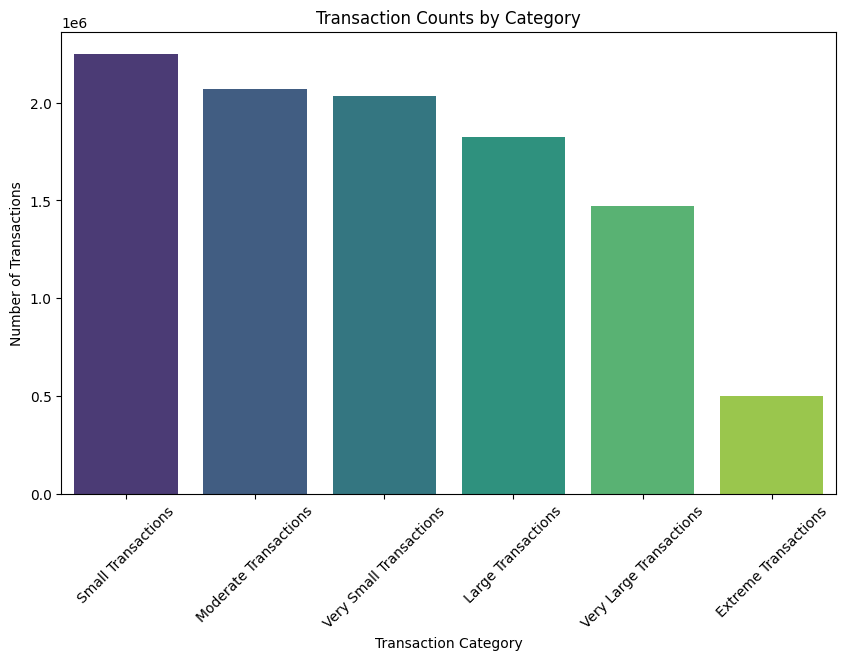

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a new column for the transaction category
df['transaction_category'] = df['monopoly_money_amount'].apply(categorize_amount)

#Bar Plot for Transaction Counts by Category
plt.figure(figsize=(10, 6))
transaction_counts = df['transaction_category'].value_counts()
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Transaction Counts by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [42]:
#Defining keywords for each transaction type
transaction_types = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Function to label transactions based on keywords
def label_transactions(to_randomly_generated_account
):
    for transaction_type, keywords in transaction_types.items():
        for keyword in keywords:
            if keyword in to_randomly_generated_account.lower():
                return transaction_type
    return 'Other'  # If none of the keywords match, label as 'Other'

#Creating a new column 'transaction_type' based on the description
df['transaction_type'] = df['to_randomly_generated_account'].apply(label_transactions)

#Updated DataFrame
print(df)


          from_totally_fake_account  monopoly_money_amount  \
0                           10371.0                   4.00   
1                           88339.0                   2.40   
2                           18555.0                   2.40   
3                           18555.0                   4.10   
4                           80792.0                   1.95   
...                             ...                    ...   
10148275                    32185.0                   2.65   
10148276                    32185.0                   2.45   
10148277                    57569.0                  14.00   
10148278                     1490.0                   9.00   
10148279                    53444.0                   2.65   

         to_randomly_generated_account not_happened_yet_date  \
0                               CINEMA            01/01/2025   
1                                40544            01/01/2025   
2                                85149            01/01/2025   

In [43]:
#Categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Initializing a dictionary to store variance for each category
category_variances = {}

#Iterating through each category and calculate variance
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    category_variances[category] = category_transactions['monopoly_money_amount'].var()

#Variance for each category
print("Variance for Each Category:")
for category, variance in category_variances.items():
    print(f"{category}: {variance}")

Variance for Each Category:
Cafe: 0.6617157213491638
Pub: 54.41778959630178
Shopping: 2740.083857306747
Bookshop: 29.17321161146735
Cinema: 4.263330753984854
Restaurant: 321.5979362867101
Supermarket: 1855.1329804855623


Plots and Figures 


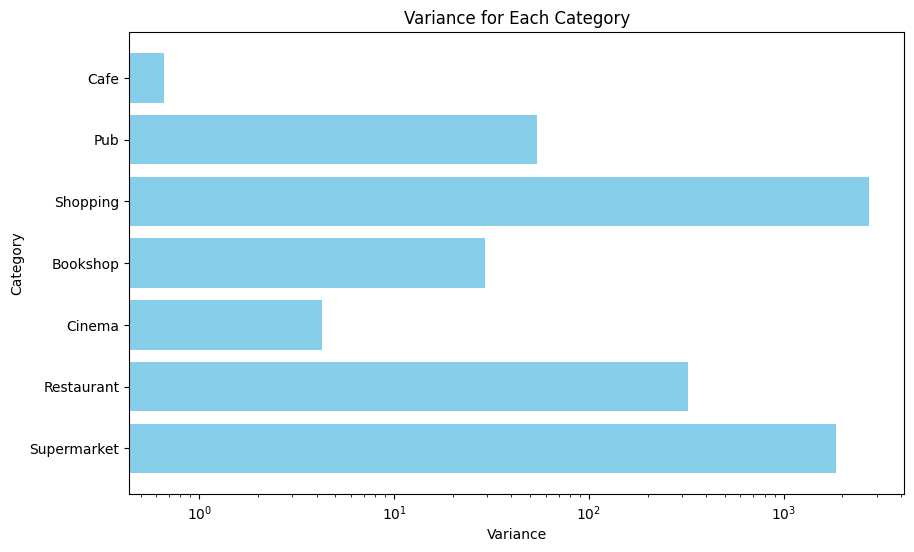

In [44]:
categories = ['Cafe', 'Pub', 'Shopping', 'Bookshop', 'Cinema', 'Restaurant', 'Supermarket']
variances = [0.6617157213391082, 54.417789595832865, 2740.0838573071296, 29.173211611485055, 4.263330753984142, 321.5979362858781, 1855.132980485769]

plt.figure(figsize=(10, 6))
plt.barh(categories, variances, color='skyblue')
plt.xlabel('Variance')
plt.ylabel('Category')
plt.title('Variance for Each Category')
plt.gca().invert_yaxis()  
plt.xscale('log')  
plt.show()


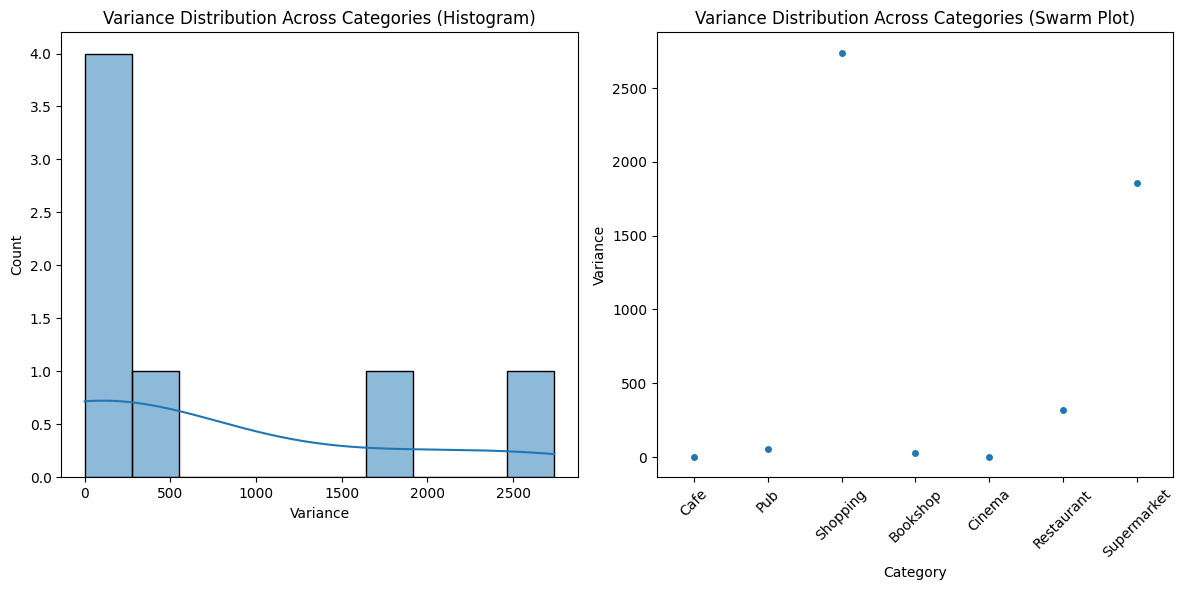

In [45]:
#Converting the dictionary to a DataFrame 
variance_df = pd.DataFrame.from_dict(category_variances, orient='index', columns=['Variance'])

#Index to get categories as a column
variance_df.reset_index(inplace=True)
variance_df.rename(columns={'index': 'Category'}, inplace=True)

#Histogram 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=variance_df, x='Variance', bins=10, kde=True)
plt.title('Variance Distribution Across Categories (Histogram)')


#Swarm Plot
plt.subplot(1, 2, 2)
sns.swarmplot(data=variance_df, x='Category', y='Variance')
plt.title('Variance Distribution Across Categories (Swarm Plot)')
plt.xticks(rotation=45)
plt.ylabel('Variance')

plt.tight_layout()
plt.show()


In [46]:
#Average spends for each category
average_spends = df.groupby('transaction_category')['monopoly_money_amount'].mean()
print("Average Spends for Each Category:")
print(average_spends)


Average Spends for Each Category:
transaction_category
Extreme Transactions       207.229152
Large Transactions          11.245461
Moderate Transactions        6.803799
Small Transactions           3.947646
Very Large Transactions     24.093807
Very Small Transactions      2.071751
Name: monopoly_money_amount, dtype: float64


In [47]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category,transaction_type
0,10371.0,4.00,CINEMA,01/01/2025,Small Transactions,Cinema
1,88339.0,2.40,40544,01/01/2025,Very Small Transactions,Other
2,18555.0,2.40,85149,01/01/2025,Very Small Transactions,Other
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions,Cafe
4,80792.0,1.95,18555,01/01/2025,Very Small Transactions,Other
...,...,...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Small Transactions,Cafe
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Very Small Transactions,Cafe
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Very Large Transactions,Pub
10148278,1490.0,9.00,57569,31/12/2025,Moderate Transactions,Other


C:\Users\sheth\AppData\Local\Temp\ipykernel_5184\56454252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_spends, x='transaction_type', y='monopoly_money_amount', palette='viridis')


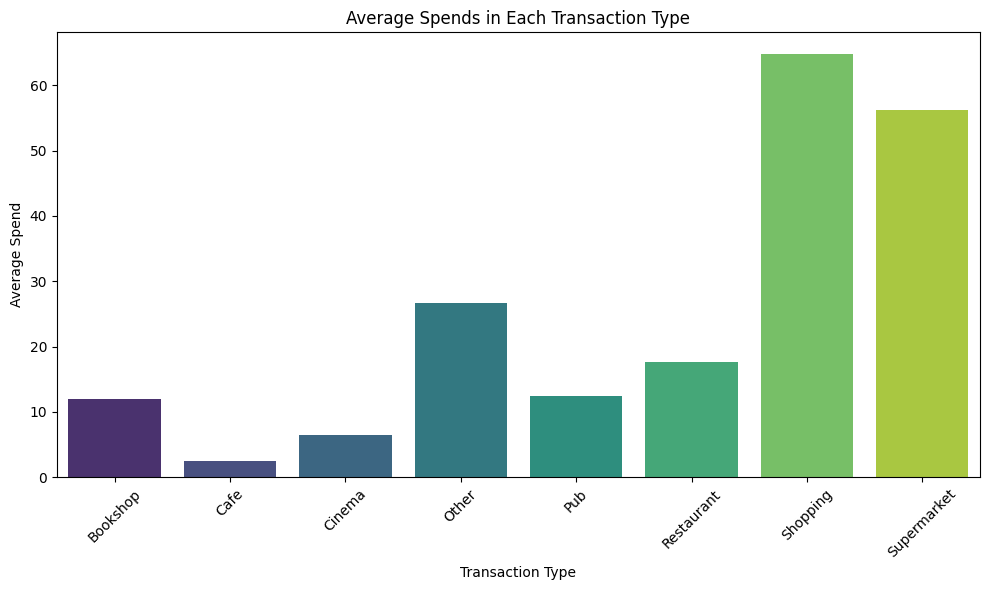

In [48]:
#Grouping the DataFrame by 'transaction_type' and calculating the average spend for each type
average_spends = df.groupby('transaction_type')['monopoly_money_amount'].mean().reset_index()

#Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_spends, x='transaction_type', y='monopoly_money_amount', palette='viridis')
plt.title('Average Spends in Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Spend')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

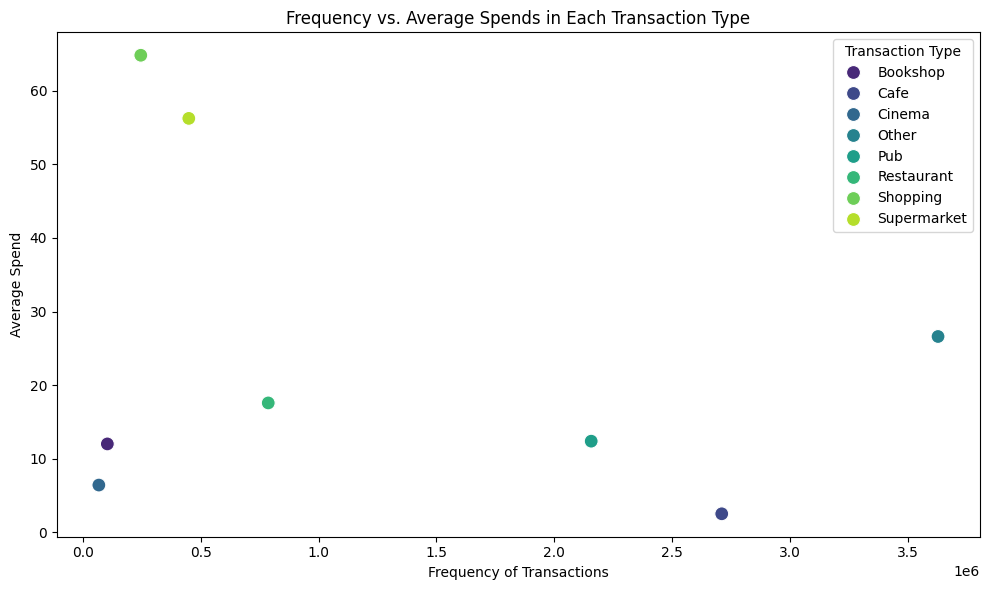

In [49]:
#Grouping the DataFrame by 'transaction_type' and calculate both the frequency and average spend for each type
type_stats = df.groupby('transaction_type').agg({'monopoly_money_amount': 'mean', 'transaction_type': 'size'}).rename(columns={'transaction_type': 'frequency'}).reset_index()

#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=type_stats, x='frequency', y='monopoly_money_amount', hue='transaction_type', palette='viridis', s=100)
plt.title('Frequency vs. Average Spends in Each Transaction Type')
plt.xlabel('Frequency of Transactions')
plt.ylabel('Average Spend')
plt.legend(title='Transaction Type', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\sheth\AppData\Local\Temp\ipykernel_5184\806177477.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_stats, x='transaction_type', y='monopoly_money_amount', palette='viridis', ax=ax1)
C:\Users\sheth\AppData\Local\Temp\ipykernel_5184\806177477.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_stats, x='transaction_type', y='frequency', palette='viridis', ax=ax2)


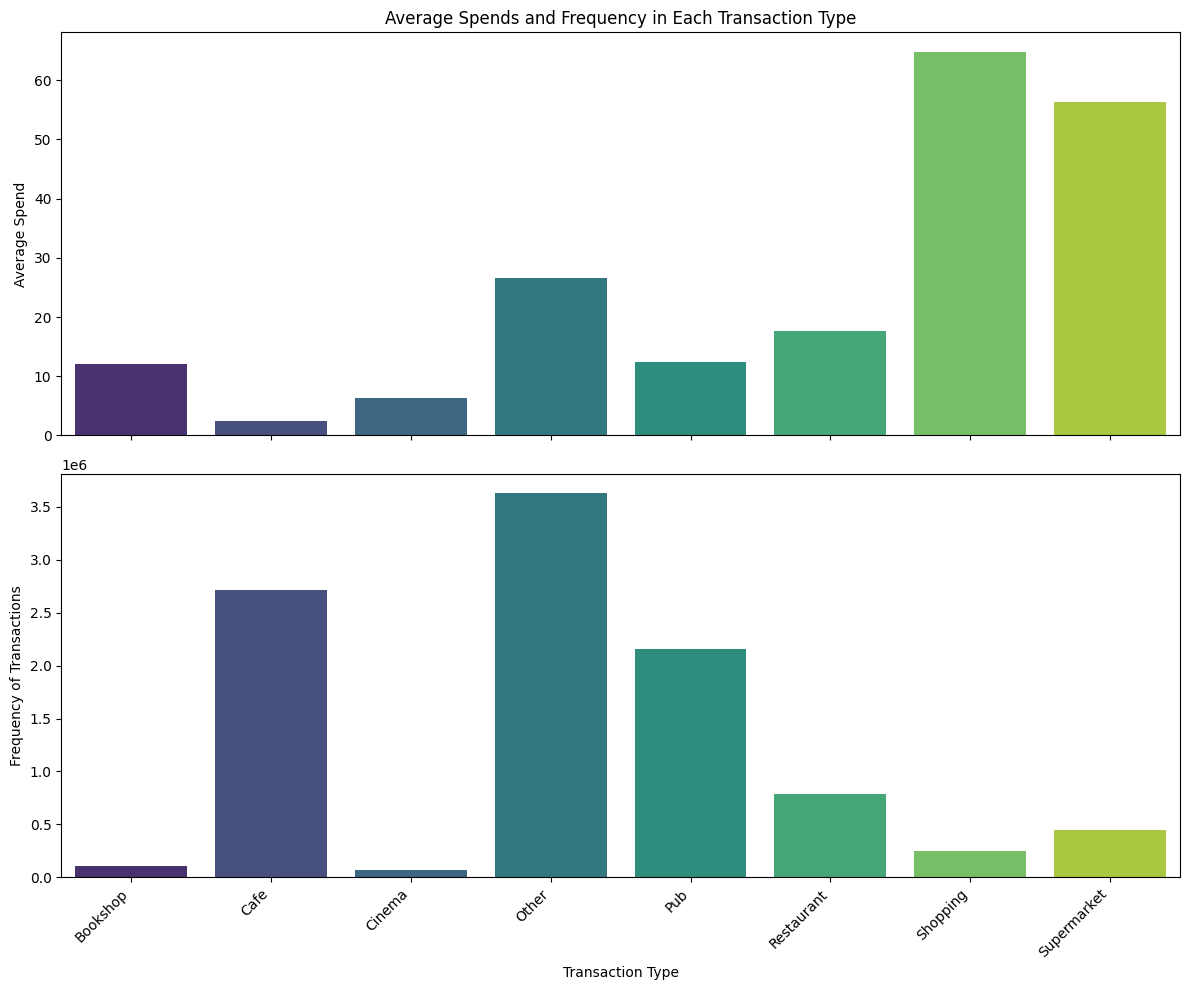

In [50]:
#Grouping the DataFrame by 'transaction_type' and calculating both the frequency and average spend for each type
type_stats = df.groupby('transaction_type').agg({'monopoly_money_amount': 'mean', 'transaction_type': 'size'}).rename(columns={'transaction_type': 'frequency'}).reset_index()

#Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

#Plotting average spends
sns.barplot(data=type_stats, x='transaction_type', y='monopoly_money_amount', palette='viridis', ax=ax1)
ax1.set_title('Average Spends and Frequency in Each Transaction Type')
ax1.set_ylabel('Average Spend')

#Plotting frequency
sns.barplot(data=type_stats, x='transaction_type', y='frequency', palette='viridis', ax=ax2)
ax2.set_ylabel('Frequency of Transactions')
ax2.set_xlabel('Transaction Type')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Time Series Approach

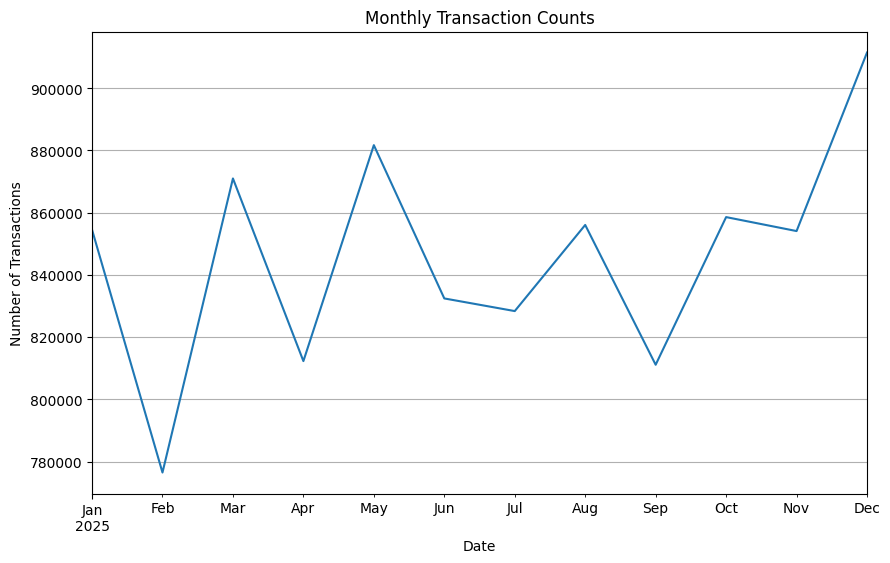

In [51]:
#Converting the date column to datetime format
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')

#Date column as the index
df.set_index('not_happened_yet_date', inplace=True)

#Performing time series analysis on the distribution of transactions over time
#Transaction volumes over months
monthly_transaction_counts = df.resample('M').size()

#Monthly transaction counts
plt.figure(figsize=(10, 6))
monthly_transaction_counts.plot()
plt.title('Monthly Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

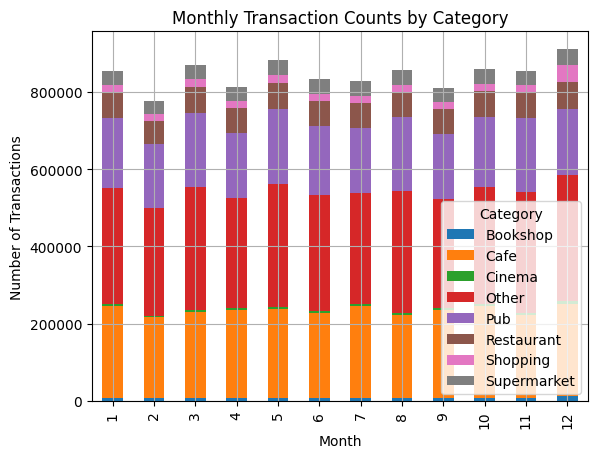

In [52]:
#Monthly transaction counts by category
monthly_category_counts = df.pivot_table(index=df.index.month, columns='transaction_type', aggfunc='size', fill_value=0)

#Plotting monthly transaction counts by category
plt.figure(figsize=(10, 6))
monthly_category_counts.plot(kind='bar', stacked=True)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Category')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

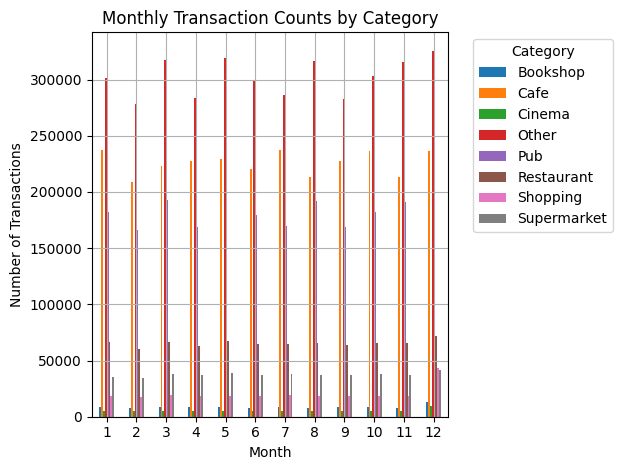

In [53]:
#Grouped bar chart
plt.figure(figsize=(12, 8))
monthly_category_counts.plot(kind='bar', stacked=False)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  
plt.grid(True)
plt.tight_layout()
plt.show()


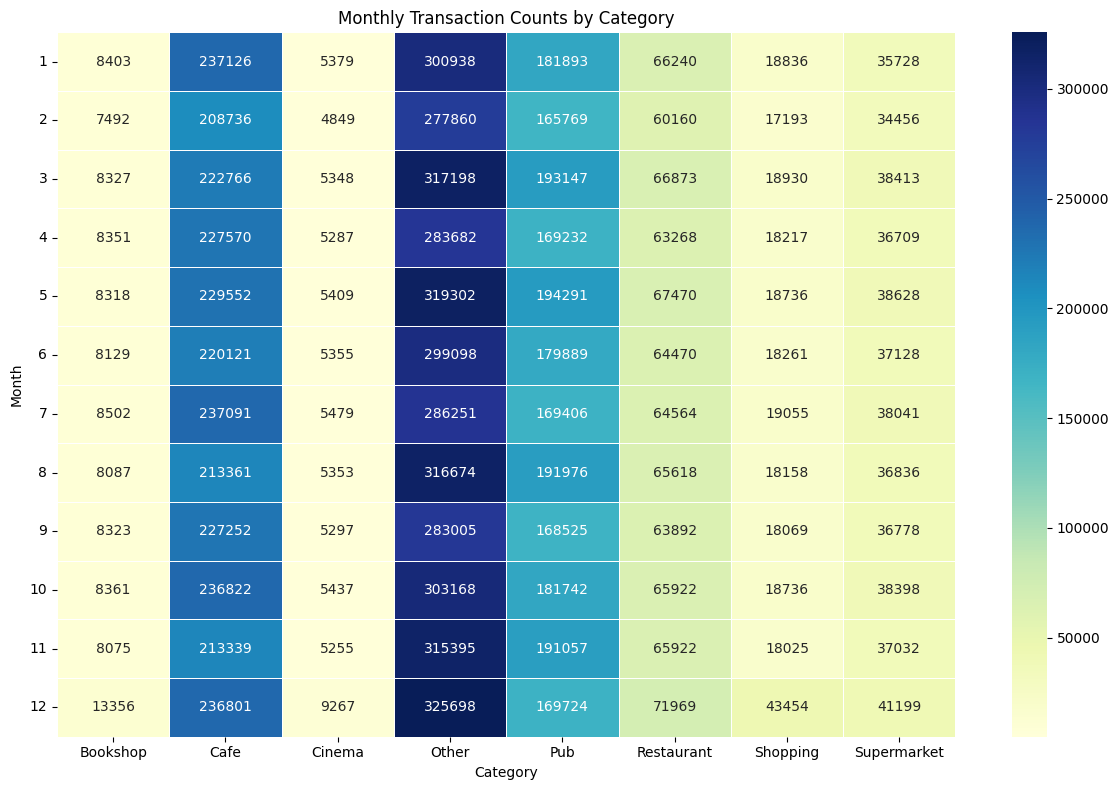

In [54]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Month')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()
